In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### create a dataset

In [11]:
N = 3000

var1 = np.random.randint(-10, 11, size=N)
var2 = np.random.randint(-10, 11, size=N)
var_sum = var1 + var2

df = pd.DataFrame(
    {
        'var1' : var1, 
        'var2' : var2,
        'var_sum' : var_sum
    }
)

In [15]:
dataT  = torch.tensor(df[['var1', 'var2']].values).float()
labelT = torch.tensor(df['var_sum'].values).float()
labelT = labelT[:,None]

### create model

In [33]:
class simpleCalculator(nn.Module):
    def __init__(self):
        super().__init__()

        ### input layer
        self.input = nn.Linear(2,32)
        
        ### hidden layers
        self.fc1 = nn.Linear(32,32)

        ### output layer
        self.output = nn.Linear(32,1)

    # forward pass
    def forward(self,x):
        x = F.relu( self.input(x) )
        x = F.relu( self.fc1(x) )
        return self.output(x)
    
def trainModel(model, x, y, numepochs=100, lr=.01):

    # loss function and optimizer
    lossfun = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    #### train the model
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        # forward pass
        yHat = model(x)

        # compute loss
        loss = lossfun(yHat,y)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # end training loop

    # compute model predictions
    with torch.no_grad():
        predictions = model(x)

    # compute accuracy
    accuracy = torch.mean( (np.abs(predictions-y)<1).float() )

    # output:
    return accuracy, predictions, losses
    

In [41]:
# initialize model
model = simpleCalculator()

# quick test to make sure the model is working
model(dataT[0, :])

tensor([0.8649], grad_fn=<ViewBackward0>)

In [42]:
# train for one time
accuracy, predictions, losses = trainModel(
    model=model, x=dataT, y=labelT, numepochs=50, lr=.01)

In [44]:
accuracy

tensor(0.9567)

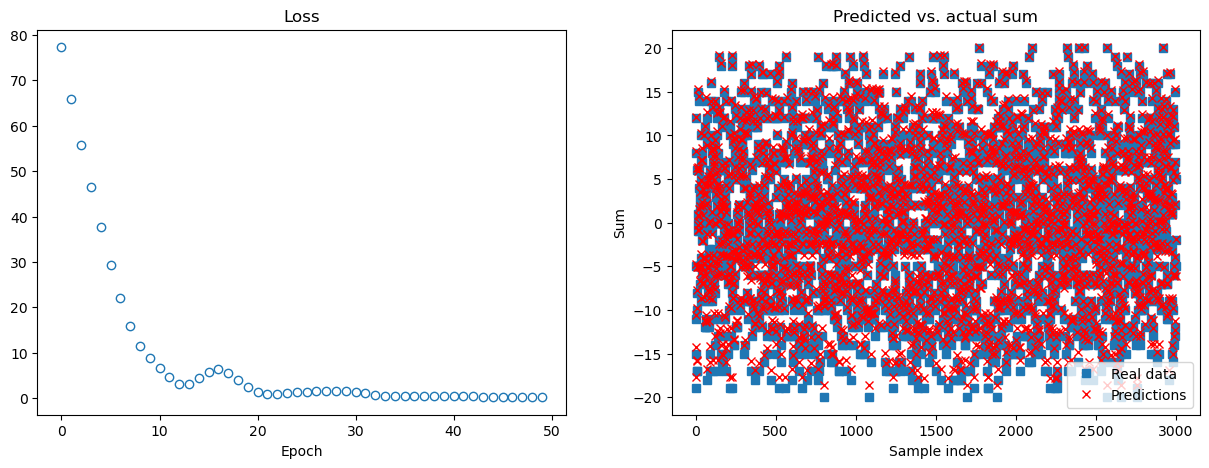

In [43]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(labelT,'s',label='Real data')
ax[1].plot(predictions,'rx',label='Predictions')
ax[1].set_xlabel('Sample index')
ax[1].set_ylabel('Sum')
ax[1].set_title(f'Predicted vs. actual sum')
ax[1].legend()

plt.show()

In [49]:
total_iter = 10
init_epo = 50
iter_res = []
for iter in range(total_iter):
    model = simpleCalculator()
    numepochs = init_epo + 10*iter
    accuracy, predictions, losses = trainModel(
        model=model, x=dataT, y=labelT, numepochs=numepochs, lr=.01)
    iter_res.append(
        {
            'iter' : iter,
            'numepochs': numepochs, 
            'accuracy': accuracy.detach()
        }
    )  

In [50]:
iter_res

[{'iter': 0, 'numepochs': 50, 'accuracy': tensor(0.9743)},
 {'iter': 1, 'numepochs': 60, 'accuracy': tensor(1.)},
 {'iter': 2, 'numepochs': 70, 'accuracy': tensor(1.)},
 {'iter': 3, 'numepochs': 80, 'accuracy': tensor(1.)},
 {'iter': 4, 'numepochs': 90, 'accuracy': tensor(1.)},
 {'iter': 5, 'numepochs': 100, 'accuracy': tensor(1.)},
 {'iter': 6, 'numepochs': 110, 'accuracy': tensor(1.)},
 {'iter': 7, 'numepochs': 120, 'accuracy': tensor(1.)},
 {'iter': 8, 'numepochs': 130, 'accuracy': tensor(1.)},
 {'iter': 9, 'numepochs': 140, 'accuracy': tensor(1.)}]